# Neural Network Example

> Thêm khối trích dẫn



Xây dựng neural network với hai tầng ẩn (hidden layer). Các trọng số và mối liên hệ giữa các tầng ẩn được thiết lập và cài đặt bằng việc sử dụng API của thư viện PyTorch

## Neural Network Overview

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

## MNIST Dataset Overview



In [ ]:
from __future__ import absolute_import, division, print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np

In [ ]:
# Chuẩn bị dữ liệu
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Chuyển đổi sang định dạng float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Chuẩn hóa ảnh từ from [0, 255] to [0, 1].
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_test, y_train, y_test = torch.from_numpy(x_train), torch.from_numpy(x_test), torch.from_numpy(y_train).type(torch.LongTensor), torch.from_numpy(y_test).type(torch.LongTensor)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

torch.Size([60000, 28, 28])

In [ ]:
batch_size = 512

In [ ]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).
# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
trainloader = []
for (i,j) in zip(x_train, y_train):
    trainloader.append([i,j])
trainloader = torch.utils.data.DataLoader(trainloader, shuffle=True, batch_size=batch_size)

testloader = []
for (i,j) in zip(x_test, y_test):
    testloader.append([i,j])
testloader = torch.utils.data.DataLoader(testloader, shuffle=True, batch_size=batch_size)

## Hiển thị một vài ví dụ

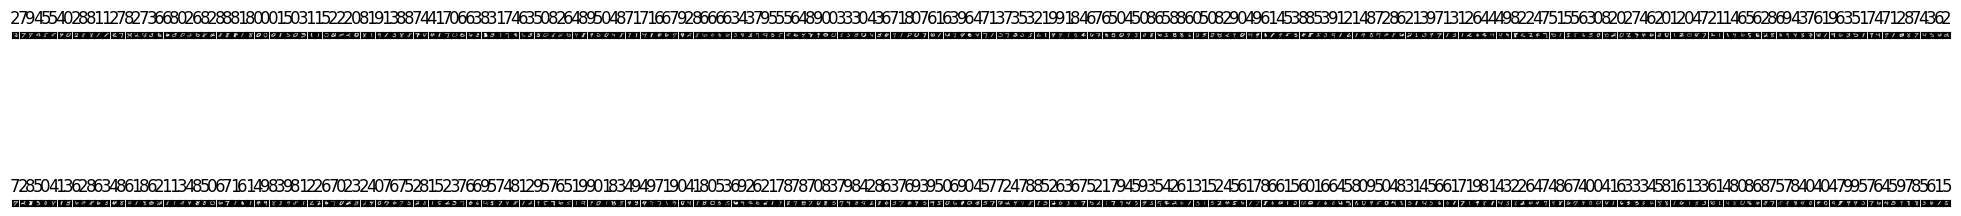

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(trainloader)
images, labels = next(dataiter)
images = images.numpy()

# hiển thị dữ liệu theo từng batch và nhãn tương ứng
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

## định nghĩa mạng
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(num_features, n_hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.fc3 = nn.Linear(n_hidden_2, num_classes)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# initialize the NN
model = MLPModel()
print(model)

MLPModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
import torch.optim as optim
# trong hàm loss cross entropy đã áp dụng hàm soft max cho vector đầu ra
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
def accuracy():
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct/total

In [ ]:
losses = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        inputs = inputs.float()
        labels = labels.long()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses.append(running_loss)
    if epoch % 10 == 9:
        print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy()))

print('Finished Training')

Iteration: 10, accuracy: 0.858
Finished Training


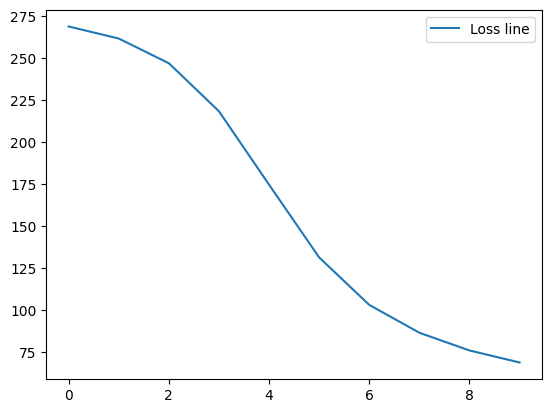

In [ ]:
# Biểu đồ biểu diễn độ biến thiên của hàm mất mát qua các vòng lặp
plt.plot([i for i in range(len(losses))], losses, label='Loss line')
# plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

## Bài tập

*   Tiến hành huấn luyện mô hình với số lượng epoch lần lượt là 50, 100, 150.Rút ra nhận xét.





*   Hiển thị một số kết quả



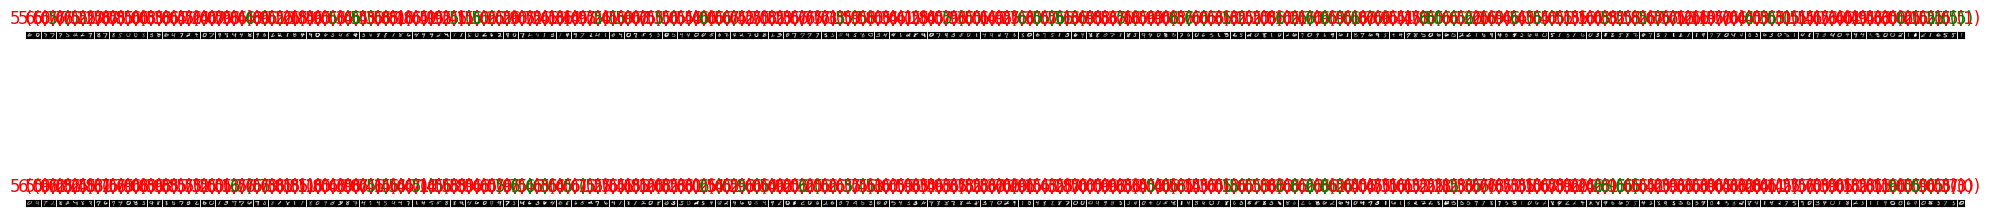

In [ ]:
# obtain one batch of test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

In [ ]:
def training(num_epochs):

  trainloader = []
  for (i,j) in zip(x_train, y_train):
    trainloader.append([i,j])
  trainloader = torch.utils.data.DataLoader(trainloader, shuffle=True, batch_size=batch_size)

  losses = []
  for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        inputs = inputs.float()
        labels = labels.long()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses.append(running_loss)

  print('Train with %d iteration, accuracy: %.3f' %(num_epochs, accuracy()))

  print('Finished Training')

In [ ]:
epochs = [50, 100, 150]

for epoch in epochs:
  training(epoch)

Train with 50 iteration, accuracy: 0.934
Finished Training
Train with 100 iteration, accuracy: 0.960
Finished Training
Train with 150 iteration, accuracy: 0.974
Finished Training


## Bài tập

*   Thiết lập thêm 3 mạng nơ ron với số tầng ẩn lần lượt là 3,5 (số lượng nơ ron của các tầng tùy ý). Với mỗi mạng mới được sinh ra, áp dụng learning-rate lần lượt bằng 0.1, 0,05, 0.001 để huấn luyện. Huấn luyện qua khoảng 100 epoch.
*   Chia tập train hiện có thành 2 phần. **85%** dữ liệu làm tập **train**, **15%** còn lại làm tập **dev**. Huấn luyện các mô hình tạo ra ở bước trên với tập **train** mới, sau đó kiểm thử trên tập **dev**.
* Dùng các model kiểm thử trên tập **test**. So sánh model cho kết quả tốt nhất khi kiểm thử trên 2 tập này và rút ra nhận xét về vai trò của tập **dev**



In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, hidden_layers):
        super(SimpleNN, self).__init__()
        layers = []
        in_size = num_features
        for h in hidden_layers:
            layers.append(nn.Linear(in_size, h))
            layers.append(nn.ReLU())
            in_size = h
        layers.append(nn.Linear(in_size, 10))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.model(x)

hidden_layers_1 = [256, 128]
hidden_layers_2 = [128, 64]
hidden_layers_3 = [256, 128, 64, 32]

learning_rates = [0.1, 0.05, 0.001]

In [ ]:
def train(hidden_layers, trainloader, epochs=100):
    model = SimpleNN(hidden_layers=hidden_layers).to(device)
    criterion = nn.CrossEntropyLoss()
    for learning_rate in learning_rates:
      print(f"Training with learning rate: {learning_rate}")
      optimizer = optim.Adam(model.parameters(), lr=learning_rate)

      for epoch in range(epochs):
        model.train()
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        if epoch %100 == 99:
          print(f"Loss: {loss}")
    return model

model_1 = train(hidden_layers_1, trainloader, 100)
model_2 = train(hidden_layers_2, trainloader, 100)
model_3 = train(hidden_layers_3, trainloader, 100)

Training with learning rate: 0.1
Loss: 0.4186432361602783
Training with learning rate: 0.05
Loss: 0.34285399317741394
Training with learning rate: 0.001
Loss: 0.3532843589782715
Training with learning rate: 0.1
Loss: 0.9745268821716309
Training with learning rate: 0.05
Loss: 0.41078540682792664
Training with learning rate: 0.001
Loss: 0.3675417900085449
Training with learning rate: 0.1
Loss: 2.301697254180908
Training with learning rate: 0.05
Loss: 2.312131881713867
Training with learning rate: 0.001
Loss: 2.303338050842285


In [ ]:
train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
train_size = int(0.85*len(x_train))
dev_size = len(x_train) - train_size
train_data, dev_data = torch.utils.data.random_split(train_dataset, [train_size, dev_size])

trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
devloader = torch.utils.data.DataLoader(dev_data, batch_size=batch_size, shuffle=False)

In [ ]:
test_dataset = torch.utils.data.TensorDataset(x_test, y_test)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
def train_and_evaluate(hidden_layers, learning_rate, trainloader, devloader, epochs=100):
    model = SimpleNN(hidden_layers=hidden_layers).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Huấn luyện
    for epoch in range(epochs):
        model.train()
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Đánh giá trên tập dev
    model.eval()
    total_correct = 0
    with torch.no_grad():
        for images, labels in devloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_correct += (predicted == labels).sum().item()

    accuracy = total_correct / len(dev_data)
    print(f"Learning Rate: {learning_rate}, Dev Accuracy: {accuracy:.4f}")
    return model

In [ ]:
model_1_dev = train_and_evaluate(hidden_layers_1, 0.1, trainloader, devloader, 100)
model_2_dev = train_and_evaluate(hidden_layers_2, 0.1, trainloader, devloader, 100)
model_3_dev = train_and_evaluate(hidden_layers_3, 0.1, trainloader, devloader, 100)

Learning Rate: 0.1, Dev Accuracy: 0.2052
Learning Rate: 0.1, Dev Accuracy: 0.8047
Learning Rate: 0.1, Dev Accuracy: 0.0993


In [ ]:
def test_model(model, testloader):
    model.eval()
    total_correct = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_correct += (predicted == labels).sum().item()

    accuracy = total_correct / len(test_dataset)
    return accuracy

In [ ]:
models = [model_1_dev, model_2_dev, model_3_dev]
for model in models:
    test_accuracy = test_model(model, testloader)
    print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.2086
Test Accuracy: 0.7966
Test Accuracy: 0.0958


Model thứ 2 cho kết quả tốt nhất trên 2 tập dev và test. Tập dev phản ánh khả năng tổng quát hóa của mô hình, giúp định hướng lựa chọn mô hình tốt nhất
